In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
print("Success")

Success


In [2]:
df = pd.read_csv('fods_1.csv')
df

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979
...,...,...,...
541,3.326,2.837,4.651
542,3.275,2.727,3.953
543,5.165,3.111,6.219
544,2.859,2.614,4.995


In [3]:
meanX1 = df['MLOGP'].mean()
meanX2 = df['RDCHI'].mean()
meanY = df['quantitative response of LC50'].mean()
stdX1 = df['MLOGP'].std()
stdX2 = df['RDCHI'].std()
stdY = df['quantitative response of LC50'].std()
print(meanX1, meanX2, meanY, stdX1, stdX2, stdY)

2.3134926739926738 2.4922985347985356 4.6584212454212475 1.741797285664983 0.8110039291512505 1.6652150617992907


In [4]:
# standardization
df['MLOGP'] = (df['MLOGP'] - meanX1)/stdX1
df['RDCHI'] = (df['RDCHI'] - meanX2)/stdX2
df['quantitative response of LC50'] = (df['quantitative response of LC50'] - meanY)/stdY
df

,MLOGP,RDCHI,quantitative response of LC50
0,0.060574,-1.562629,-0.551533
1,0.186306,-1.345614,-0.197225
2,2.001098,0.539703,1.417582
3,1.802453,0.486683,1.239827
4,1.007297,0.327620,0.793038
...,...,...,...
541,0.581300,0.425031,-0.004457
542,0.552020,0.289396,-0.423622
543,1.637106,0.762883,0.937163
544,0.313186,0.150063,0.202123


In [5]:
df.isnull().sum()

MLOGP                            0
RDCHI                            0
quantitative response of LC50    0
dtype: int64

In [6]:
train, test = train_test_split(df, test_size=0.2) # this is a random split
train

,MLOGP,RDCHI,quantitative response of LC50
491,-0.417668,0.224045,0.098833
113,-0.380350,0.360913,-0.952682
285,-1.462566,-0.637850,-0.565946
26,1.915554,1.891115,1.466224
134,-0.550864,-0.742658,-1.938741
...,...,...,...
54,0.044498,0.147597,0.997816
493,0.542834,-0.632917,-0.215240
341,-0.324086,1.447220,-0.260279
358,0.836209,0.738223,-0.389392


In [7]:
test

,MLOGP,RDCHI,quantitative response of LC50
352,-1.999367,-0.196421,-1.154458
103,-1.046329,0.445992,2.216278
399,-0.381498,0.042788,-0.913048
17,1.300672,1.704926,1.822334
486,-0.742620,0.587792,0.565440
...,...,...,...
233,-0.133479,-1.212446,-0.202029
92,-0.068029,0.727125,1.432595
386,0.650769,-0.228480,0.164290
523,-1.214546,-0.875826,0.148677


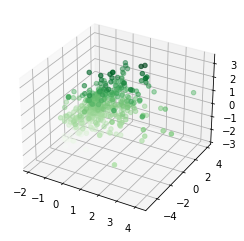

In [8]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = train["quantitative response of LC50"]
xdata = train["RDCHI"]
ydata = train["MLOGP"]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [9]:
trainX = pd.DataFrame(train[["RDCHI", "MLOGP"]])
trainX

,RDCHI,MLOGP
491,0.224045,-0.417668
113,0.360913,-0.380350
285,-0.637850,-1.462566
26,1.891115,1.915554
134,-0.742658,-0.550864
...,...,...
54,0.147597,0.044498
493,-0.632917,0.542834
341,1.447220,-0.324086
358,0.738223,0.836209


In [10]:
trainY = pd.DataFrame(train["quantitative response of LC50"])
trainY

,quantitative response of LC50
491,0.098833
113,-0.952682
285,-0.565946
26,1.466224
134,-1.938741
...,...
54,0.997816
493,-0.215240
341,-0.260279
358,-0.389392


In [11]:
testX = pd.DataFrame(test[["RDCHI", "MLOGP"]])
testY = pd.DataFrame(test['quantitative response of LC50'])
testX

,RDCHI,MLOGP
352,-0.196421,-1.999367
103,0.445992,-1.046329
399,0.042788,-0.381498
17,1.704926,1.300672
486,0.587792,-0.742620
...,...,...
233,-1.212446,-0.133479
92,0.727125,-0.068029
386,-0.228480,0.650769
523,-0.875826,-1.214546


In [12]:
testY

,quantitative response of LC50
352,-1.154458
103,2.216278
399,-0.913048
17,1.822334
486,0.565440
...,...
233,-0.202029
92,1.432595
386,0.164290
523,0.148677


In [13]:
valX = trainX[trainX.columns[:]].to_numpy()
valX = np.append(np.ones((436,1)), valX, axis=1)
valY = trainY[trainY.columns[:]].to_numpy()
np.shape(valX)
# np.reshape(valX, (436,3))

(436, 3)

In [14]:
np.shape(valY)

(436, 1)

In [15]:
valTestX = testX[testX.columns[:]].to_numpy()
valTestX = np.append(np.ones((110,1)), valTestX, axis=1)
valTestY = testY[testY.columns[:]].to_numpy()
np.shape(valTestX)

(110, 3)

In [16]:
np.shape(valTestY)

(110, 1)

In [17]:
iters = 1500000
learningRate = 0.001 #yeta or n
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)
TrainErrorArray = np.array([])
TestErrorArray = np.array([])

In [18]:
# Degree 1 here without regularization
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0))#del E
    # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2]
#     for j in range(np.shape(valX)[0]):
#         w2 += (((valY[j,0] - (w*valX[j,:wSize])))*valX[j,:wSize])/np.shape(valX)[0]

    #w2 = w2/np.shape(valX)[0] #N
    
    w1 = w - learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "= ", w[i], sep = '')


w0= 0.57812715689832
w1= 0.6293951405894433
w2= 0.647745946310366


In [19]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
TrainErrorArray = np.append(TrainErrorArray, w1)
w1/np.shape(valX)[0]

1.2032831466730627

In [20]:
testError = 0
for i in range(np.shape(valTestX)[0]):
    testError += (np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2
    
TestErrorArray = np.append(TestErrorArray, testError)
testError/np.shape(valTestX)[0]

1.3332692544144253

In [21]:
# Reularization variables
Lambda = np.exp(-6)
q = 0.5

In [22]:
# Degree 1 here with regularization q = 0.5
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    z = w.copy()
    z = z**(q-1)
    z[0] = 0
    w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0)) + Lambda*q*(z)/2
    # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2], z = [0,w1,w2]
    
    w1 = w - learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "= ", w[i], sep = '')


w0= 0.57812715689832
w1= 0.6293945209013991
w2= 0.6477453266223219


In [23]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TrainErrorArray = np.append(TrainErrorArray, w1)
w1/np.shape(valX)[0]

1.2062053539585502

In [24]:
testError = 0
for i in range(np.shape(valTestX)[0]):
    testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TestErrorArray = np.append(TestErrorArray, testError)
testError/np.shape(valTestX)[0]

1.3361911205453298

In [25]:
# Reularization variables
Lambda = 0.5 #np.exp(-5)
q = 1

In [26]:
# Degree 1 here with regularization q = 1
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    z = np.array([0,1,1])
    w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0)) + Lambda*q*(z)/2
    # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2], z = [0,w1,w2]
    
    w1 = w - learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "= ", w[i], sep = '')


w0= 0.57812715689832
w1= 0.6291451405894433
w2= 0.647495946310366


In [27]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w))/2

TrainErrorArray = np.append(TrainErrorArray, w1)
w1/np.shape(valX)[0]

1.6666194864710913

In [28]:
testError = 0
for i in range(np.shape(valTestX)[0]):
    testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TestErrorArray = np.append(TestErrorArray, testError)
testError/np.shape(valTestX)[0]

1.7964679633225051

In [29]:
# Reularization variables
Lambda = 0.5
q = 2

In [30]:
# Degree 1 here with regularization q = 2
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    z = w.copy()
    z[0]=0
    w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0)) + Lambda*q*(z**(q-1))/2
    # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2], z = [0,w1,w2]
    
    w1 = w - learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "= ", w[i], sep = '')


w0= 0.57812715689832
w1= 0.6288951405894433
w2= 0.6472459463103659


In [31]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TrainErrorArray = np.append(TrainErrorArray, w1)
w1/np.shape(valX)[0]

1.4897388908372202

In [32]:
testError = 0
for i in range(np.shape(valTestX)[0]):
    testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TestErrorArray = np.append(TestErrorArray, testError)
testError/np.shape(valTestX)[0]

1.6194497381871045

In [33]:
# Reularization variables
Lambda = np.exp(-7)
q = 4

In [34]:
# Degree 1 here with regularization q = 4
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    z = w.copy()
    z[0]=0
    w2 = (np.sum((valY-np.reshape(np.sum(w*valX, axis = 1), (np.shape(valX)[0],1)))*valX*-1, axis = 0)) + Lambda*q*(z**(q-1))/2
    # sum(Y-wX)*X where X = [1,x1,x2], so we get a matrix of 1x3 and w = [w0,w1,w2], z = [0,w1,w2]
    
    w1 = w - learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "= ", w[i], sep = '')


w0= 0.57812715689832
w1= 0.6293933168255121
w2= 0.6477441225464349


In [35]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TrainErrorArray = np.append(TrainErrorArray, w1)
w1/np.shape(valX)[0]

1.2034832960696153

In [36]:
testError = 0
for i in range(np.shape(valTestX)[0]):
    testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TestErrorArray = np.append(TestErrorArray, testError)
testError/np.shape(valTestX)[0]

1.3334683997809411

In [37]:
print(TrainErrorArray/np.shape(valX)[0])
print(TestErrorArray/np.shape(valTestX)[0])

[1.20328315 1.20620535 1.66661949 1.48973889 1.2034833 ]
[1.33326925 1.33619112 1.79646796 1.61944974 1.3334684 ]
